# Métodos iterativos 
#### https://meet.noysi.com/metodosnumericos1

Vamos a aplicar el método de Jacobi para resolver el sistema
\begin{cases}
3 x - y + z = 3,\\
x + 5 y - z = 2,\\
x + y + 4 z = 1.
\end{cases}


Definimos las matrices del método:

In [1]:
A = matrix(RDF,[[3,-1,1],[1,5,-1],[1,1,4]])
M = matrix(RDF,[[3,0,0],[0,5,0],[0,0,4]])
N = M - A
b = vector(RDF,[3,2,1])

En este caso está justificado calcular la inversa, por ser inmediata y no añadir mucho error.

In [2]:
# Se podría calcular directamente
Mi = matrix.diagonal([k^-1 for k in M.diagonal()], sparse=true)
show(Mi)

[0.3333333333333333                0.0                0.0]
[               0.0                0.2                0.0]
[               0.0                0.0               0.25]

Tomamos como aproximación inicial el vector nulo:

In [3]:
x0 = vector([0,0,0])

Y aplicamos el método

In [4]:
x1 = Mi*(N*x0+b)
x1

(1.0, 0.4, 0.25)

In [9]:
x1 = M\(N*x0+b)
x1

(1.0, 0.4, 0.25)

In [5]:
x2 = Mi*(N*x1+b)
x2

(1.0499999999999998, 0.25, -0.09999999999999998)

In [6]:
x3 = Mi*(N*x2+b)
x3

(1.1166666666666667, 0.17000000000000004, -0.07499999999999996)

Comparamos con la solución exacta.

In [8]:
A\b, x3, (A\b - x3).norm()

((1.078125, 0.17187500000000003, -0.062499999999999986),
 (1.1166666666666667, 0.17000000000000004, -0.07499999999999996),
 0.040561381811329435)

<div class="alert alert-block alert-info">
    <strong>Ejercicio 1. </strong>
   a) Aplica 5 pasos del método de Jacobi para aproximar una solución del sistema y compara los valores obtenidos con la solución exacta $$\left(\begin{array}{rrr} 15.0 & -1.0 & 1.0 \\ 2.0 & -5.0 & 1.0 \\ 1.0 & 1.0 & -3.0 \end{array}\right)x = \left(\begin{array}{r} 1.0 \\ 2.0 \\ 3.0  \end{array}\right).$$
   
   b) Aplica 5 pasos del método de Gauss-Seidel para aproximar una solución del sistema anterior y compara los valores obtenidos con la solución exacta y con el método de Jacobi.
   
   c) Encuentra una matriz tal que el método de Jacobi converja y el de Gauss-Seidel no. 
   
   d) Encuentra una matriz tal que el método de Gauss-Seidel converja y el de Jacobi no. 
   
   e) En los apartados a) y b), aplica los métodos hasta que el error estimado con el criterio de parada sea menor que $10^{-3}$. Compara el error estimado con el error real.
   
   f) (Para valientes) Elige una matriz estrictamente diagonal dominante y un término independiente. Representa en una gráfica la estimación del error del criterio de parada para los métodos de Jacobi y Gauss-Seidel y el error exacto, para un número de pasos entre 3 y 20.
</div>

In [73]:
a = 0.13
b = 1.0
A = matrix([[a,-1.0,1.0],[2.0,-5.0,1.0],[b,1.0,-3.0]])
show(A)       

[0.130000000000000 -1.00000000000000  1.00000000000000]
[ 2.00000000000000 -5.00000000000000  1.00000000000000]
[ 1.00000000000000  1.00000000000000 -3.00000000000000]

In [71]:
MJ = matrix(RDF,[[a,0,0],[0,-5.0,0],[0,0,-3.0]])
NJ = MJ - A
max([k.abs() for k in (MJ.inverse()*NJ).eigenvalues()]) # No converge

1.0364673138735379

In [74]:
MG = matrix(RDF,[[a,0,0],[2.0,-5.0,0],[b,1.0,-3.0]])
NG = MG - A
max([k.abs() for k in (MG.inverse()*NG).eigenvalues()]) # Converge

0.9731328052816965

# Representación de matrices
Un método para visualizar matrices cuando la dimensión es muy grande es mediante su representación como imagen. 

Para ello, la matriz $A\in\mathcal{M}_n$, consideramos una cuadrícula de $nxn$ píxeles. Numeramos los píxeles comenzando desde la esquina superior izquierda (ojo - esto depende fuertemente del lenguaje y librerías que estemos utilizando). Así, la posición $(1,1)$ será la esquina superior izquierda y la $(1,n)$ la superior derecha.

En cada posición dibujaremos un color según el valor de dicha posición en la matriz. 

Sage utiliza el color negro para el mayor valor, el blanco para el más pequeño y tonos de grises para los intermedios. (Esto también depende del lenguaje/librería que usemos, usualmente se emplea el blanco para el valor más grande).

In [75]:
A = matrix([[1,2,3,4],[1,1,1,1],[4,4,4,4],[1,1,1,4]])
show(A)

[1 2 3 4]
[1 1 1 1]
[4 4 4 4]
[1 1 1 4]

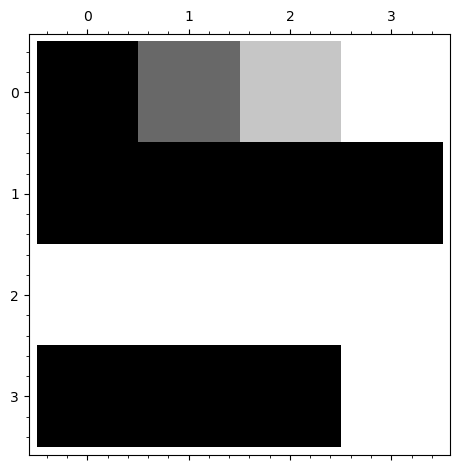

In [77]:
matrix_plot(-A)

## Matrices dispersas
Muchos sistemas lineales tienen gran parte de los coeficientes nulos. En ese tipo de sistemas, no merece la pena guardar todos esos ceros, sino la lista de valores no nulos. Para indicarle al ordenador que trabaje de ese modo, debemos indicar que la matriz es dispersa (sparse).

In [78]:
A = matrix(QQ,[[1,0,0,1],[0,2,0,0],[1,0,3,0],[0,0,0,4]],sparse=true)
show(A)

[1 0 0 1]
[0 2 0 0]
[1 0 3 0]
[0 0 0 4]

En ese caso, al representarla únicamente marca los valores no nulos, sin discriminar el valor. 

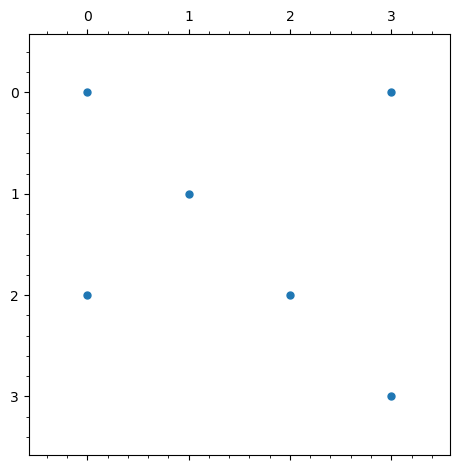

In [79]:
matrix_plot(A)

<div class="alert alert-block alert-info">
    <strong>Ejercicio 2. </strong>
Consideremos la matriz
$$A=\left(\begin{array}{rrrrr} 
 4   & -1      & 0     & 0 & -1 \\
 0   &  4      & -1    & -1 & 0 \\
-1   &  0      & 4    & 0 & 0 \\
-1   &  0      & 0    & 4 & 0 \\
-1   &  0      & 0    & 0 & 4 \\
\end{array}\right)$$

a) Calcula la factorización LU de $A$. Cuenta cuántos valores no nulos hay en la matriz $A$ y cuántos hay en las matrices $L$ y $U$. 
   
b) Aplica tres pasos del método de Jacobi para resolver el sistema $Ax = b$ con $b=(1,1,1,1,1)$,
    usando matrices dispersas. 
    
c) Idem para el método de Gauss-Seidel. 
</div>

In [3]:
A = matrix([[4,-1,-1,-1,-1],
           [-1,4,0,0,0],
           [-1,0,4,0,0],
           [-1,0,0,4,0],
           [-1,0,0,0,4]])
show(A)

[ 4 -1 -1 -1 -1]
[-1  4  0  0  0]
[-1  0  4  0  0]
[-1  0  0  4  0]
[-1  0  0  0  4]

In [4]:
A.LU()

(
[1 0 0 0 0]  [    1     0     0     0     0]
[0 1 0 0 0]  [ -1/4     1     0     0     0]
[0 0 1 0 0]  [ -1/4 -1/15     1     0     0]
[0 0 0 1 0]  [ -1/4 -1/15 -1/14     1     0]
[0 0 0 0 1], [ -1/4 -1/15 -1/14 -1/13     1],

[    4    -1    -1    -1    -1]
[    0  15/4  -1/4  -1/4  -1/4]
[    0     0 56/15 -4/15 -4/15]
[    0     0     0  26/7  -2/7]
[    0     0     0     0 48/13]
)

##  <font color='green'> Difuminando y perfilando una imagen (opcional) </font>

Vamos a ver un ejemplo de cómo se puede aplicar el método iterativo de Gauss-Seidel. Concretamente, veremos cómo funciona (de modo básico) un modelo de difuminado y perfilado. Estos modelos se aplican por ejemplo a imágenes de satélite para eliminar los efectos de difusión de la atmósfera, al análisis de imágenes por ordenador, para retocar fotografías, etc.

Cada imagen viene cargada en una matriz (por simplicidad asumiremos que está en blanco y negro). Vamos a necesitar algunas funciones que nos pasen los datos de la matriz a un vector y viceversa. Para ello, basta ejecutar la siguiente celda.

In [ ]:
def matrix_to_vector(A):
    n,m=A.dimensions();
    v=vector(RDF,n*m)
    for i in range(0,n):
        for j in range(0,m):
            v[m*i+j]=A[i,j];
    return v;
def vector_to_matrix(v):
    n=sqrt(v.degree());
    A=matrix(RDF,n);
    for i in range(0,n):
        for j in range(0,n):
            A[i,j]=v[n*i+j];
    return A;

Para pasar la matriz a un vector, numeramos las celdas comenzando por la primera fila:

$\left(\begin{array}{rrr}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right)\to(1,2,3,4,5,6,7,8,9)$

Definimos la matriz en la que tenemos la imagen. Cuando creamos la matriz estará a cero (color negro). Vamos a poner algunas posiciones a uno (blanco).

In [ ]:
n=5
B = matrix.zero(RDF,n)
B[1,1:4]=Matrix([1,1,1]) 
B[3,1:4]=Matrix([1,1,1]) 
B[2,1]=1
show(matrix_plot(B), figsize=5)

Creamos la matriz de difuminado (está libremente basado en el difuminado gaussiano). Para ello cada posición pasa a tomar "un poco del color de los vecinos". Estamos considerando cuatro vecinos (arriba, abajo, derecha e izquierda). Si A(i,j) es el color del punto (i,j), después de la transformación será: $$A(i,j)\to (1-4d) A(i,j)+d\,A(i-1,j)+d\,A(i+1,j)+d\,A(i,j-1)+d\,A(i,j+1)$$

Esto puede hacerse escribiendo la matriz $A$ en forma de vector y multiplicando el vector por cierta matriz (dada por la expresión anterior). Guardaremos en $N$ la matriz por la que hay que multiplicar (matriz de difuminado).

In [ ]:
A=matrix(RDF,n*n,sparse=true);
d=1/10;
for i in range(0,n-1):
    for j in range(0,n):
        A[i+j*n,i+1+j*n]=d;   # vecino a la derecha (i+1,j)
        A[i+1+j*n,i+j*n]=d;   # vecino a la izquierda (i-1,j)
        A[i*n+j,(i+1)*n+j]=d; # vecino superior (i,j+1)
        A[(i+1)*n+j,i*n+j]=d; # vecino inferior (i,j-1)
for i in range(0,n*n):
    A[i,i]=1-4*d;         #  posición original (i,j)
matrix_plot(A)

Para difuminar la imagen, escribimos la matriz como vector y multiplicamos ese vector por la matriz de difuminado

In [ ]:
Bv=matrix_to_vector(B) # Necesitamos considerar la imagen como un vector
b=A*Bv # difuminamos
show(matrix_plot(vector_to_matrix(b)), figsize=5)  # Para dibujar necesitamos volver a pasar a la forma de matriz

Y podemos hacer el proceso inverso resolviendo el sistema $Nx=b$, para lo cual Gauss-Seidel es un método apropiado (a cada paso se perfila un poco más la imagen). Véamoslo en el ejemplo.

Construimos las matrices de Gauss-Seidel

In [ ]:
N = matrix(RDF,n*n);
for i in range(0,n*n):
    for j in range(i+1,n*n):
        N[i,j] =- A[i,j];
M = A + N;

Y aplicamos el método

In [ ]:
x0 = vector(RDF,n*n)
m = 3                              # Número de iteraciones del método
for i in range(1,m+1):
    x0 = M.solve_right(N*x0+b)
matrix_plot(vector_to_matrix(vector(x0)))